In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [3]:
dirName = "../lettersketch/assets/train_images/"
fileNames = []
fileLetters = []
for fileName in os.listdir(dirName):
    if fileName.endswith(".png") and (not "__" in fileName):
       fileNames.append(dirName+fileName)
       letter = fileName.split("_")[1]
       fileLetters.append(letter)

In [4]:
data = np.array([mpimg.imread(fileName) for fileName in fileNames], dtype = np.float64)
data.shape

(50, 20, 28)

In [5]:
data = data.reshape(50, 20*28)
data.shape

(50, 560)

In [6]:
# Convert white into black background
for dt in np.nditer(data, op_flags=['readwrite']):
    if (dt == 1.0):
        dt[...] = 0.0

In [109]:
# Load the test data
testNames = []
for fileName in os.listdir(dirName):
    if fileName.endswith(".png") and ("__" in fileName):
       testNames.append(dirName+fileName)
    
testData = np.array([mpimg.imread(fileName) for fileName in testNames], dtype = np.float64)
print testData.shape

# Convert white into black background
for dt in np.nditer(testData, op_flags=['readwrite']):
    if (dt == 1.0):
        dt[...] = 0.0

(6, 20, 28)


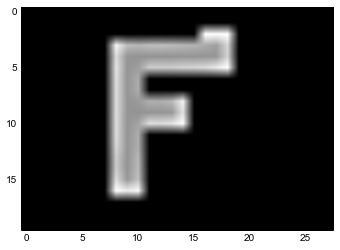

In [106]:
imgplot = plt.imshow(data[9].reshape(20,28), cmap="gray")

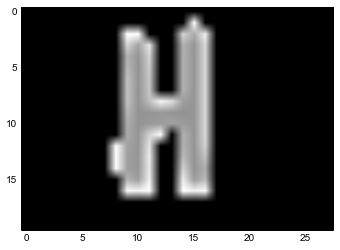

In [133]:
testplot = plt.imshow(testData[1].reshape(20,28), cmap ="gray")

In [9]:
labelDict = {'E':0.0, 'F':1.0, 'H':2.0, 'I':3.0, 'L':4.0, 'T':5.0}
print fileLetters

['L', 'L', 'F', 'F', 'F', 'H', 'F', 'F', 'I', 'F', 'L', 'E', 'H', 'F', 'L', 'I', 'L', 'L', 'E', 'H', 'T', 'F', 'I', 'H', 'I', 'T', 'I', 'T', 'L', 'H', 'E', 'E', 'I', 'I', 'T', 'F', 'H', 'T', 'E', 'H', 'E', 'F', 'L', 'F', 'E', 'F', 'L', 'H', 'T', 'T']


In [10]:
fileLabels = [labelDict[letter] for letter in fileLetters]
print fileLabels

[4.0, 4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 3.0, 1.0, 4.0, 0.0, 2.0, 1.0, 4.0, 3.0, 4.0, 4.0, 0.0, 2.0, 5.0, 1.0, 3.0, 2.0, 3.0, 5.0, 3.0, 5.0, 4.0, 2.0, 0.0, 0.0, 3.0, 3.0, 5.0, 1.0, 2.0, 5.0, 0.0, 2.0, 0.0, 1.0, 4.0, 1.0, 0.0, 1.0, 4.0, 2.0, 5.0, 5.0]


In [11]:
def vectorizeLabels(label):
    vector = np.zeros((6))
    vector[label] = 1.0
    return vector

In [12]:
dataLabels = np.array([vectorizeLabels(label) for label in fileLabels])
print dataLabels[0]

[ 0.  0.  0.  0.  1.  0.]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [13]:
print data.shape

(50, 560)

In [30]:
print dataLabels.shape
training_data = zip(data, dataLabels)
print training_data

(50, 6)
[(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.98823529,  0.88235295,  0.95294118,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.88627452,  0.58823532,  0.71764708,  0.     

In [67]:
%load nnutils.py

In [15]:
#---------------------------------------------------
# Utilities for working with a standard neural net
#---------------------------------------------------
import numpy as np
import numpy.random as random

In [135]:
#---------------------------------------------------
# A neural net class
#---------------------------------------------------
class NeuralNet(object):

  """ Constructor
  #   layers: vector of length numLayers containing the
  #          the number of neurons in each layer
  #           e.g., layers = (4, 3, 2) -> 4 input values, 3 neurons in hidden layer, 2 output values
  #   biases: initialized with random numbers except for first layer
  #           e.g., biases = [ [b11, b21, b31]^T, 
  #                            [b12, b22]^T ]
  #   weights: initialized with random numbers 
  #           e.g., [ [[w111, w121, w131, w141], 
  #                    [w211, w221, w231, w241],
  #                    [w311, w321, w331, w341]],
  #                   [[w112, w122, w132],
  #                    [w212, w222, w232]] ]
  """
  def __init__(self, layers):

    self.numLayers = len(layers)
    self.numNeurons = layers
    self.biases = [random.randn(layer, 1) for layer in layers[1:]]
    self.weights = [random.randn(layer2, layer1) 
                    for layer1, layer2 in zip(layers[:-1], layers[1:])]
    

  """ Batch stochastic gradient descent to find minimum of objective function
  #   training_data:  [(x1,y1),(x2,y2),....]
  #                   where x1, x2, x3, ... are input data vectors
  #                         y1, y2, y3, ... are labels
  #   max_iterations: number of iterations
  #   batch_size:     size of training batch
  #   learning_rate:  gradient descent parameter 
  """
  def batchStochasticGradientDescent(self, training_data, max_iterations, batch_size,
                                     learning_rate):

    # Get the number of training images
    nTrain = len(training_data)

    # Loop thru iterations
    for it in xrange(max_iterations):

      # Shuffle the training data
      random.shuffle(training_data)

      # Choose subsets of the training data
      batches = [ training_data[start:start+batch_size]
                  for start in xrange(0, nTrain, batch_size) ]

      # Loop thru subsets
      for batch in batches:
        self.updateBatch(batch, learning_rate)
      
      #print "Iteration {0} complete".format(it)
        
    #print "weights = ", self.weights
    #print "biases = ", self.biases

  """ Partial update of weights and biases using gradient descent
  #   with back propagation
  """
  def updateBatch(self, batch, learning_rate): 

    # Initialize gradC_w and gradC_b
    gradC_w = [np.zeros(w.shape) for w in self.weights]
    gradC_b = [np.zeros(b.shape) for b in self.biases]
    
    # Loop through samples in the batch
    for xx, yy in batch:
    
      # Compute correction to weights & biases using forward and backprop
      delta_gradC_w, delta_gradC_b = self.updateGradient(xx, yy)

      # Update the gradients
      gradC_w = [grad + delta_grad for grad, delta_grad in zip(gradC_w, delta_gradC_w)]
      gradC_b = [grad + delta_grad for grad, delta_grad in zip(gradC_b, delta_gradC_b)]

    # Update the weight and biases
    self.weights = [ weight - (learning_rate/len(batch))*grad
                     for weight, grad in zip(self.weights, gradC_w) ]
    self.biases  = [ bias - (learning_rate/len(batch))*grad
                     for bias, grad in zip(self.biases, gradC_b) ]

  # Forward and then backpropagation to compute the gradient of the objective function
  def updateGradient(self, xx, yy):

    # Reshape into column vectors
    xx = np.reshape(xx, (len(xx), 1))
    yy = np.reshape(yy, (len(yy), 1))
    
    # Initialize gradC_w and gradC_b
    gradC_w = [np.zeros(w.shape) for w in self.weights]
    gradC_b = [np.zeros(b.shape) for b in self.biases]

    # Compute forward pass through net
    # Initial activation value = input value
    activationValue = xx
    activationValues = [xx]
    layerOutputValues = []
    
    # Loop through layers
    for weight, bias in zip(self.weights, self.biases):

      layerOutputValue = np.dot(weight, activationValue) + bias
      layerOutputValues.append(layerOutputValue)

      activationValue = self.activationFunction(layerOutputValue)
      activationValues.append(activationValue)
      
    # Compute backpropagation corrections
    # Initial deltas
    delta = self.derivOfCostFunction(activationValues[-1], yy) * self.derivActivationFunction(layerOutputValues[-1])

    gradC_b[-1] = delta
    gradC_w[-1] = np.dot(delta, activationValues[-2].transpose())

    # Loop backward thru layers
    for layer in xrange(2, self.numLayers):

      layerOutputValue = layerOutputValues[-layer]
      derivActivation = self.derivActivationFunction(layerOutputValue)
  
      delta = np.dot(self.weights[-layer + 1].transpose(), delta)*derivActivation

      gradC_b[-layer] = delta
      gradC_w[-layer] = np.dot(delta, activationValues[-layer-1].transpose())
    
    # Return updated gradients
    return(gradC_w, gradC_b)

  # The activation function
  def activationFunction(self, xx):

    return 1.0/(1.0 + np.exp(-xx))

  # Derivative of activation function
  def derivActivationFunction(self, xx):

    return self.activationFunction(xx)*(1.0 - self.activationFunction(xx))
  
  # Derivative of the cost function with respect to output values
  def derivOfCostFunction(self, xx, yy):
    return (xx - yy)

  # The feedforward output computation for the network
  #   inputVector: (n, 1) array
  #                n = number of inputs to network
  #   outputVector: ????
  def forwardCompute(self, inputVector):

    for bias, weight in zip(self.biases, self.weights):
      xx = np.dot(weight, inputVector) + bias
      inputVector = self.activationFunction(xx)

    return inputVector
  

In [136]:
net = NeuralNet([4, 3, 2])

In [27]:
net.weights

[array([[ 0.38175982, -0.64208919,  0.46326183,  0.40372461],
        [ 1.29534022,  0.65060652, -0.83362051, -0.19704967],
        [-0.90187361,  0.06607388,  2.25014831,  0.85984807]]),
 array([[-0.6494288 , -1.29325919,  0.43613163],
        [ 0.73944842,  0.92740159,  0.83080807]])]

In [137]:
net.biases

[array([[-1.36398354],
        [-0.60779925],
        [ 1.00851713]]), array([[ 0.9806461 ],
        [ 0.22375176]])]

In [ ]:
testNN = NeuralNet([28*20, 10, 6])
max_iterations = 100
batch_size = 1
learning_rate = 0.01
testNN.batchStochasticGradientDescent(training_data, max_iterations, batch_size,
                                     learning_rate)

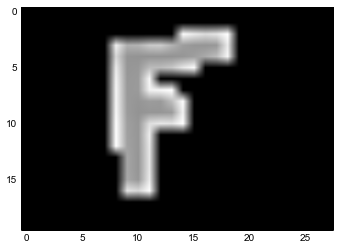

In [150]:
testplot = plt.imshow(testData[5].reshape(20,28), cmap ="gray")

In [148]:
result = testNN.forwardCompute(np.reshape(testData[5], (28*20,1)))
letterIndex = np.argmax(result)
print letterIndex
print labelDict.keys()[labelDict.values().index(letterIndex)]

1
F
